In [1]:
import tensorflow as tf

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)


Epoch 1/10


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2108 - accuracy: 0.9373
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0836 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0580 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0429 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0350 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0290 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0253 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0201 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step 

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9855


[0.06084037944674492, 0.9854999780654907]

In [10]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions on the whole test set
pred_probs = model.predict(x_test)  # Shape: (10000, 10)
pred_classes = np.argmax(pred_probs, axis=1)  # Shape: (10000,)

# Print classification report
print(classification_report(y_test, pred_classes))


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



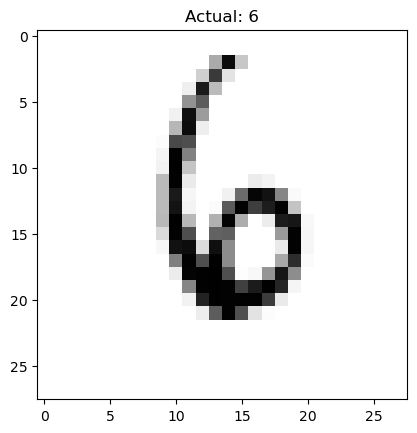

1/1 [==============================] - 0s 22ms/step
Predicted Label: 6


In [12]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
plt.title(f"Actual: {y_test[image_index]}")
plt.show()
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted Label:", pred.argmax())